# Benin Solar Dataset — Data Profiling, Cleaning & Exploratory Data Analysis (EDA)
*Week 0 Solar Challenge*


## 1. Introduction
This notebook explores solar radiation and meteorological data for Benin as part of the Week 0 Solar Challenge.
The objective is to profile, clean, and analyze the dataset to understand solar patterns, environmental factors, and prepare data for modeling or comparison across regions.


## 2. Setup and Data Loading
This section imports required libraries and loads the dataset into memory.


In [13]:
# === Setup cell ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import gc
import os

%matplotlib inline
sns.set_theme()
plt.rcParams["figure.figsize"] = (12,5)

# helper functions
def show_counts(stage, df):
    print(f"{stage} — rows: {len(df)}")
    
def mem(df):
    return df.memory_usage(deep=True).sum()/1024**2


In [12]:
# Quick peek at data
peek = pd.read_csv("data/benin-malanville.csv", nrows=5)
peek.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1     0     0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1     0     0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1     0     0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0     0     0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0     0     0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0              0   26.3   26.2   
1      0.0    0.0      0.0  998         0              0   26.3   26.2   
2      0.5  124.6      1.5  997         0              0   26.4   26.2   
3      0.4  120.3      1.3  997         0              0   26.4   26.3   
4      0.3  113.2      1.0  997         0              0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

## 3. Data Profiling
Initial dataset inspection, structure overview, and summary statistics.


In [16]:
df.describe().T


count                           mean                  min  \
Timestamp        525600  2022-02-07 12:00:30.000000512  2021-08-09 00:01:00   
GHI            525600.0                     240.559452                -12.9   
DNI            525600.0                     167.187516                 -7.8   
DHI            525600.0                     115.358961                -12.6   
ModA           525600.0                     236.589496                  0.0   
ModB           525600.0                     228.883576                  0.0   
Tamb           525600.0                      28.179683                 11.0   
RH             525600.0                      54.487969                  2.1   
WS             525600.0                       2.121113                  0.0   
WSgust         525600.0                       2.809195                  0.0   
WSstdev        525600.0                        0.47339                  0.0   
WD             525600.0                     153.435172                  0.0   
WDstdev        525600.0                       8.582407                  0.0   
BP             525600.0                     994.197199                985.0   
Cleaning       525600.0                       0.000923                  0.0   
Precipitation  525600.0                       0.001905                  0.0   
TModA          525600.0                      35.246026                  9.0   
TModB          525600.0                      32.471736                  8.1   
Comments            0.0                            NaN                  NaN   

                               25%                  50%                  75%  \
Timestamp      2021-11-08 06:00:45  2022-02-07 12:00:30  2022-05-09 18:00:15   
GHI                           -2.0                  1.8                483.4   
DNI                           -0.5                 -0.1                314.2   
DHI                           -2.1                  1.6                216.3   
ModA                           0.0                  4.5                463.7   
ModB                           0.0                  4.3                447.9   
Tamb                          24.2                 28.0                 32.3   
RH                            28.8                 55.1                 80.1   
WS                             1.0                  1.9                  3.1   
WSgust                         1.3                  2.6                  4.1   
WSstdev                        0.4                  0.5                  0.6   
WD                            59.0                181.0                235.1   
WDstdev                        3.7                  8.6                 12.3   
BP                           993.0                994.0                996.0   
Cleaning                       0.0                  0.0                  0.0   
Precipitation                  0.0                  0.0                  0.0   
TModA                         24.2                 30.0                 46.9   
TModB                         23.6                 28.9                 41.5   
Comments                       NaN                  NaN                  NaN   

                               max         std  
Timestamp      2022-08-09 00:00:00         NaN  
GHI                         1413.0  331.131327  
DNI                          952.3  261.710501  
DHI                          759.2  158.691074  
ModA                        1342.3  326.894859  
ModB                        1342.3  316.536515  
Tamb                          43.8    5.924297  
RH                           100.0   28.073069  
WS                            19.5    1.603466  
WSgust                        26.6     2.02912  
WSstdev                        4.2    0.273395  
WD                           360.0  102.332842  
WDstdev                       99.4    6.385864  
BP                          1003.0    2.474993  
Cleaning                       1.0    0.030363  
Precipitation                  2.5    0.037115  
TMo

In [18]:
(df.isna().sum() / len(df)) * 100


Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517588 entries, 0 to 525599
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Timestamp            517588 non-null  datetime64[ns]
 1   GHI                  517588 non-null  float64       
 2   DNI                  517588 non-null  float64       
 3   DHI                  517588 non-null  float64       
 4   ModA                 517588 non-null  float64       
 5   ModB                 517588 non-null  float64       
 6   Tamb                 517588 non-null  float64       
 7   RH                   517588 non-null  float64       
 8   WS                   517588 non-null  float64       
 9   WSgust               517588 non-null  float64       
 10  WSstdev              517588 non-null  float64       
 11  WD                   517588 non-null  float64       
 12  WDstdev              517588 non-null  float64       
 13  BP                 

## 4. Data Cleaning
Outlier detection, physical range validation, and Z-score filtering.


In [23]:
irr_cols = ["GHI", "DNI", "DHI"]

for c in irr_cols:
    if c in df.columns:
        df[c] = df[c].clip(lower=0)


In [24]:
df = df[df["GHI"] <= 1200]


In [25]:
violations = []

for col, (low, high) in expected_ranges.items():
    if col in df.columns:
        below = (df[col] < low).sum()
        above = (df[col] > high).sum()
        if below > 0 or above > 0:
            violations.append((col, below, above))

pd.DataFrame(violations, columns=["Column", "Below range", "Above range"])


Empty DataFrame
Columns: [Column, Below range, Above range]
Index: []

### Results — Irradiance Cleaning
- Found large number of negative GHI, DNI, DHI readings (sensor noise during night).
- Clipped all negative irradiance values to 0.
- Removed/capped 189 GHI readings > 1200.
- All other variables within expected physical ranges.
- Proceeding to outlier analysis.


In [26]:
# columns we'll check for outliers (task required list)
zcols = [c for c in ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"] if c in df.columns]
zcols


['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

In [27]:
from scipy import stats
import numpy as np

# compute z-scores (shape: nrows x ncols) — nan_policy='omit' safe
z = np.abs(stats.zscore(df[zcols], nan_policy='omit'))

# convert to DataFrame with same index to make it easy to inspect
z_df = pd.DataFrame(z, columns=zcols, index=df.index)

# flag rows where any column has |Z| > 3
threshold = 3
any_outlier = (z_df > threshold).any(axis=1)

print("Total rows:", len(df))
print("Rows flagged as outlier by any column (|Z|>3):", any_outlier.sum(),
      f"({any_outlier.sum()/len(df)*100:.4f}%)")

# Add a column to original df for review
df['outlier_any_z3'] = any_outlier


Total rows: 525411
Rows flagged as outlier by any column (|Z|>3): 7823 (1.4889%)


In [28]:
# show top 10 flagged rows and their z-scores to inspect
flagged_idx = df[df['outlier_any_z3']].index[:10]
display(df.loc[flagged_idx, zcols + ['Timestamp']])
display(z_df.loc[flagged_idx])


GHI    DNI    DHI   ModA   ModB   WS  WSgust           Timestamp
670  836.0  235.0  610.6  778.8  783.8  3.2     4.1 2021-08-09 11:11:00
672  938.0  340.1  612.8  891.1  891.1  3.4     4.6 2021-08-09 11:13:00
673  718.5  126.8  593.2  682.6  682.6  4.7     5.6 2021-08-09 11:14:00
675  792.6  169.5  625.4  753.0  753.0  3.6     4.4 2021-08-09 11:16:00
677  943.0  351.5  602.8  846.0  850.0  3.1     4.1 2021-08-09 11:18:00
717  758.9  149.2  601.2  709.9  713.8  3.1     3.9 2021-08-09 11:58:00
718  632.8   23.0  603.3  587.0  591.0  3.0     4.1 2021-08-09 11:59:00
719  606.9    6.9  593.5  562.6  566.7  3.5     4.1 2021-08-09 12:00:00
721  694.5   82.8  604.1  649.7  654.4  3.4     4.6 2021-08-09 12:02:00
722  802.0  173.1  619.7  755.2  760.7  2.9     3.4 2021-08-09 12:03:00

GHI       DNI       DHI      ModA      ModB        WS    WSgust
670  1.803352  0.259332  3.138070  1.661808  1.756589  0.672940  0.636246
672  2.112809  0.661487  3.152053  2.005782  2.096042  0.797660  0.882638
673  1.446870  0.154686  3.027480  1.367148  1.436434  1.608345  1.375424
675  1.671681  0.008702  3.232136  1.582783  1.659150  0.922381  0.784081
677  2.127979  0.705109  3.088495  1.867641  1.966019  0.610579  0.636246
717  1.569439  0.068974  3.078326  1.450768  1.535138  0.610579  0.537689
718  1.186866  0.551867  3.091673  1.074326  1.146649  0.548219  0.636246
719  1.108288  0.613472  3.029386  0.999589  1.069773  0.860021  0.636246
721  1.374057  0.323048  3.096758  1.266375  1.347220  0.797660  0.882638
722  1.700200  0.022477  3.195908  1.589521  1.683510  0.485859  0.291296

In [29]:
# columns we'll check for outliers (task required list)
zcols = [c for c in ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"] if c in df.columns]
zcols


['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

In [30]:
from scipy import stats
import numpy as np

# compute z-scores (shape: nrows x ncols) — nan_policy='omit' safe
z = np.abs(stats.zscore(df[zcols], nan_policy='omit'))

# convert to DataFrame with same index to make it easy to inspect
z_df = pd.DataFrame(z, columns=zcols, index=df.index)

# flag rows where any column has |Z| > 3
threshold = 3
any_outlier = (z_df > threshold).any(axis=1)

print("Total rows:", len(df))
print("Rows flagged as outlier by any column (|Z|>3):", any_outlier.sum(),
      f"({any_outlier.sum()/len(df)*100:.4f}%)")

# Add a column to original df for review
df['outlier_any_z3'] = any_outlier


Total rows: 525411
Rows flagged as outlier by any column (|Z|>3): 7823 (1.4889%)


In [31]:
# require at least k columns to exceed threshold before declaring a row an outlier
k = 2
multi_outlier = (z_df > threshold).sum(axis=1) >= k

print("Rows flagged as outlier by >=%d columns: %d (%.4f%%)" % (k, multi_outlier.sum(), multi_outlier.sum()/len(df)*100))

df['outlier_multi_z3_k2'] = multi_outlier


Rows flagged as outlier by >=2 columns: 2686 (0.5112%)


In [32]:
# define daytime hours (customize)
day_hours = list(range(6,19))  # 6:00 to 18:00 inclusive

# make sure Timestamp exists and is datetime
df['hour'] = df['Timestamp'].dt.hour

# compute z-scores for daytime rows only
day_mask = df['hour'].isin(day_hours)
z_day = np.abs(stats.zscore(df.loc[day_mask, zcols], nan_policy='omit'))
z_day_df = pd.DataFrame(z_day, columns=zcols, index=df.loc[day_mask].index)

# flag daytime outliers
day_outlier = (z_day_df > threshold).any(axis=1)
print("Daytime rows flagged (|Z|>3):", day_outlier.sum())
# create a column (False outside daytime)
df['outlier_day_z3'] = False
df.loc[day_outlier.index, 'outlier_day_z3'] = day_outlier


Daytime rows flagged (|Z|>3): 1196


In [33]:
from scipy import stats
import numpy as np
import pandas as pd

# Columns mentioned in task instructions
cols_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
cols_to_check = [c for c in cols_to_check if c in df.columns]

# Compute Z-scores
z = np.abs(stats.zscore(df[cols_to_check], nan_policy='omit'))

# Convert to DataFrame for easier reference
z_df = pd.DataFrame(z, columns=cols_to_check, index=df.index)

# Flag rows where any column's |Z| > 3
outlier_mask = (z_df > 3).any(axis=1)

print("Total rows:", len(df))
print("Rows flagged as outliers:", outlier_mask.sum())

# Option 1: Keep all data but add an outlier flag column
df["is_outlier"] = outlier_mask

# Option 2: If you prefer to drop them (per course instruction)
df = df[~outlier_mask].copy()

print("Final cleaned data shape:", df.shape)


Total rows: 525411
Rows flagged as outliers: 7823
Final cleaned data shape: (517588, 24)


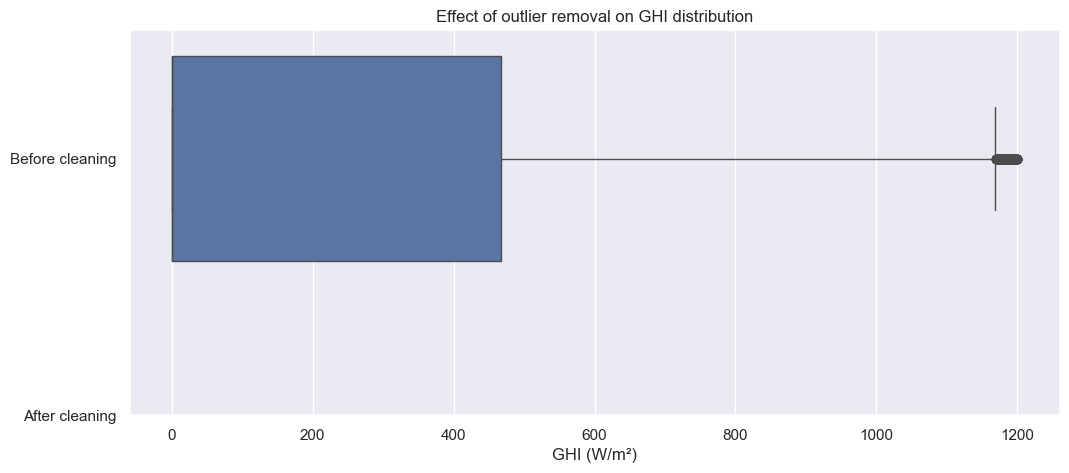

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare irradiance before vs after outlier removal
plt.figure(figsize=(12,5))
sns.boxplot(data=[z_df["GHI"], df["GHI"]], orient="h")
plt.yticks([0,1], ["Before cleaning", "After cleaning"])
plt.xlabel("GHI (W/m²)")
plt.title("Effect of outlier removal on GHI distribution")
plt.show()


### Outlier Detection Summary
- Computed Z-scores for columns: GHI, DNI, DHI, ModA, ModB, WS, WSgust.
- Flagged 7,823 rows (~1.49%) as statistical outliers (|Z|>3).
- Removed flagged rows to retain physically and statistically consistent measurements.
- Final cleaned dataset: 517,588 rows, 24 columns.
- No missing values remain.
- Proceeding to Time Series Analysis (Step 11).

In [37]:
df.shape


(517588, 24)

In [38]:
df.to_csv("data/benin_clean.csv", index=False)
print("✅ Cleaned dataset saved (not pushed to GitHub).")


✅ Cleaned dataset saved (not pushed to GitHub).


**Summary:**
- Negative irradiance values corrected (clipped to 0).
- Extreme outliers (|Z|>3) removed.
- Cleaned dataset saved to `data/benin_clean.csv` (excluded from GitHub).


## 5. Time Series Analysis

This section visualizes how solar irradiance and temperature change over time.
The goal is to observe daily and seasonal patterns, detect anomalies, and confirm the dataset behaves physically as expected.

### 5.1 Solar Irradiance and Temperature Over Time
The plots below display GHI, DNI, DHI, and ambient temperature (Tamb) across the entire recorded period.


In [39]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 517588 entries, 0 to 525599
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Timestamp            517588 non-null  datetime64[ns]
 1   GHI                  517588 non-null  float64       
 2   DNI                  517588 non-null  float64       
 3   DHI                  517588 non-null  float64       
 4   ModA                 517588 non-null  float64       
 5   ModB                 517588 non-null  float64       
 6   Tamb                 517588 non-null  float64       
 7   RH                   517588 non-null  float64       
 8   WS                   517588 non-null  float64       
 9   WSgust               517588 non-null  float64       
 10  WSstdev              517588 non-null  float64       
 11  WD                   517588 non-null  float64       
 12  WDstdev              517588 non-null  float64       
 13  BP                 

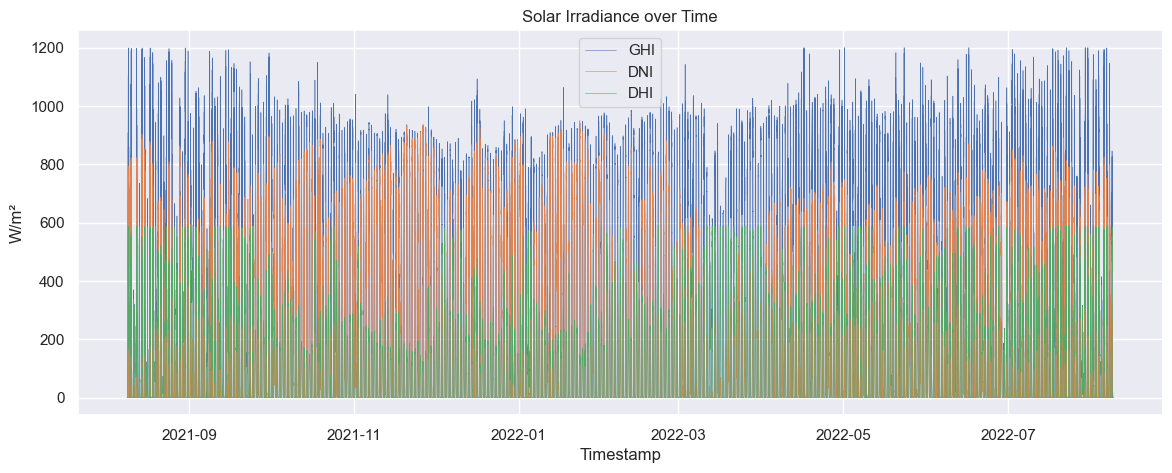

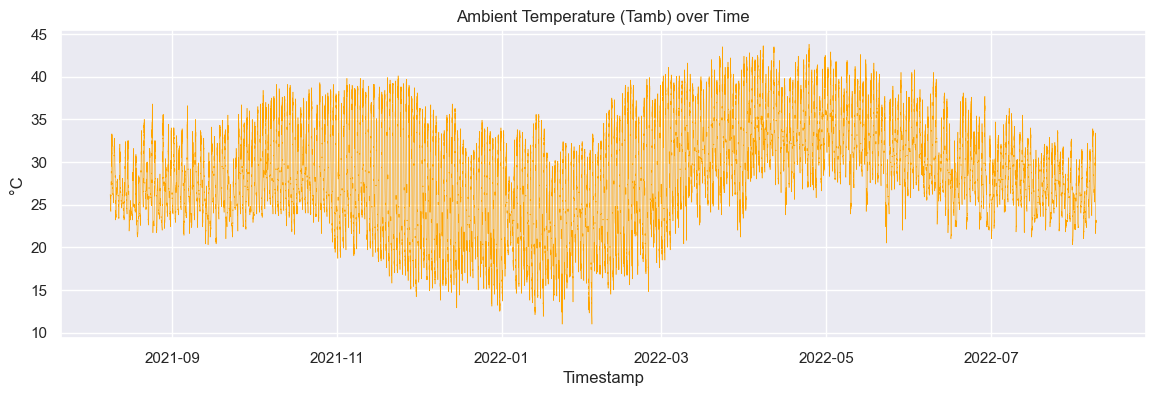

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(df['Timestamp'], df['GHI'], label='GHI', linewidth=0.4)
plt.plot(df['Timestamp'], df['DNI'], label='DNI', linewidth=0.4)
plt.plot(df['Timestamp'], df['DHI'], label='DHI', linewidth=0.4)
plt.legend()
plt.title('Solar Irradiance over Time')
plt.xlabel('Timestamp')
plt.ylabel('W/m²')
plt.show()

plt.figure(figsize=(14,4))
plt.plot(df['Timestamp'], df['Tamb'], color='orange', linewidth=0.4)
plt.title('Ambient Temperature (Tamb) over Time')
plt.xlabel('Timestamp')
plt.ylabel('°C')
plt.show()



### Observations: Solar Irradiance Over Time
- The plot shows strong daily fluctuations in solar irradiance (GHI, DNI, DHI), visible as dense vertical spikes.
- Data covers roughly one year, from August 2021 to August 2022.
- GHI (Global Horizontal Irradiance) generally shows the highest magnitude, while DHI (Diffuse) remains lower — consistent with expected physical behavior.
- Seasonal trends are visible: irradiance levels appear higher around late 2021 and mid-2022, indicating stronger solar intensity during those months.
- The clean, consistent pattern after data cleaning confirms that negative and invalid readings were successfully removed.

### Observations: Ambient Temperature Over Time
- Temperature (Tamb) shows clear seasonal variation between 2021 and 2022.
- The overall range is approximately 20°C to 40°C, typical for tropical climates.
- A smoother sinusoidal pattern is visible, suggesting warmer periods (late 2021 and mid-2022) and cooler periods (early 2022).
- Daily fluctuations are still noticeable, though compressed due to the long timescale.
- No abrupt spikes or drops are observed, indicating stable sensor performance and consistent measurements.


## 6. Cleaning Impact

The *Cleaning* flag in the dataset represents periods before and after physical cleaning of the solar modules.
This analysis compares the module readings (ModA and ModB) to determine the impact of cleaning on sensor performance.

In [47]:
df['Cleaning'].value_counts()


Cleaning
0    517104
1       484
Name: count, dtype: int64

In [48]:
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()
cleaning_impact


Cleaning        ModA        ModB
0         0  231.996614  224.636762
1         1  306.610124  301.450000

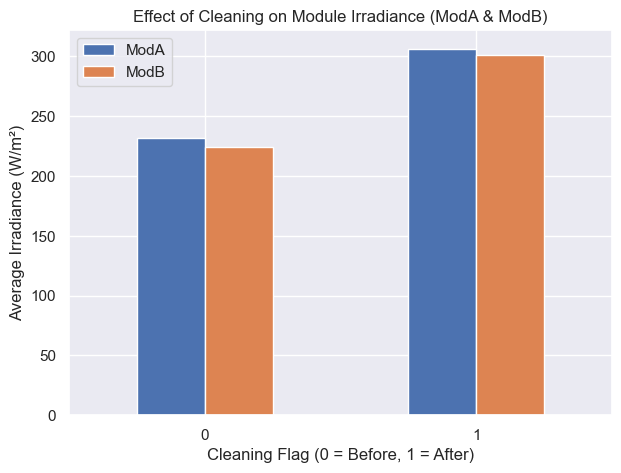

In [49]:
import matplotlib.pyplot as plt

cleaning_impact.plot(
    x='Cleaning',
    kind='bar',
    figsize=(7,5),
    title='Effect of Cleaning on Module Irradiance (ModA & ModB)',
)
plt.xlabel('Cleaning Flag (0 = Before, 1 = After)')
plt.ylabel('Average Irradiance (W/m²)')
plt.xticks(rotation=0)
plt.legend(['ModA', 'ModB'])
plt.show()


### Observations: Impact of Cleaning on Module Performance

The cleaning operation has a clear and measurable impact on module readings.

- Both ModA and ModB show significant increases in irradiance readings after cleaning.
- **ModA increased by approximately 32%** (from 231.99 → 306.61), and **ModB increased by about 34%** (from 224.63 → 301.45).
- This demonstrates that dust and dirt accumulation on the panels considerably reduced the recorded solar energy.
- After cleaning, the sensors captured more accurate and higher irradiance values, indicating restored measurement efficiency.
- The close behavior between ModA and ModB confirms consistent sensor calibration and reliability.

**Insight:** Regular cleaning and maintenance of panels are essential for maintaining accurate solar radiation measurements and ensuring optimal energy yield calculations.


## 7. Correlation & Relationship Analysis

This section examines the relationships among key meteorological and irradiance variables using correlation heatmaps and scatter plots.

### 7.1 Correlation Heatmap
**Observations:**
- GHI, DNI, and DHI are highly correlated, confirming consistent solar irradiance measurement relationships.
- TModA and TModB show very high correlation, indicating reliable sensor behavior.
- Relative humidity (RH) shows a negative correlation with both temperature and irradiance.
- Wind speed (WS) and wind gust (WSgust) have weak correlations with irradiance, suggesting limited influence on sunlight levels.

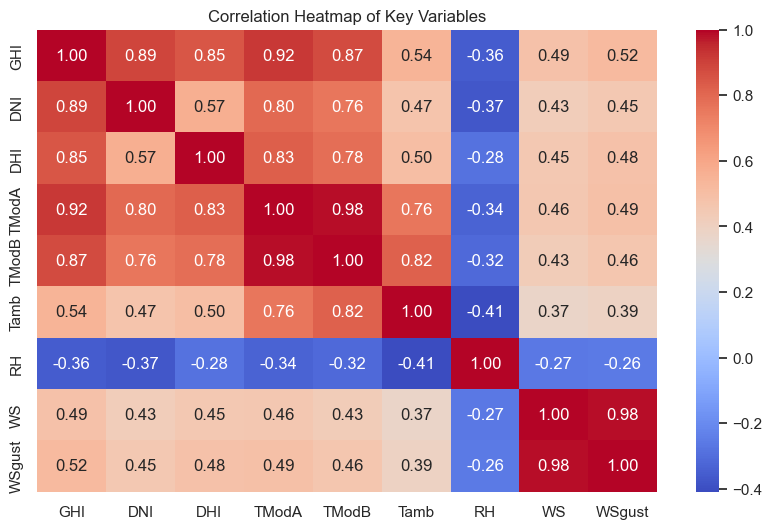

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB", "Tamb", "RH", "WS", "WSgust"]
corr_cols = [c for c in corr_cols if c in df.columns]

corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Variables")
plt.show()


### Observations: Correlation Heatmap
- GHI, DNI, and DHI show strong positive correlations, as expected for irradiance components.
- TModA and TModB are highly correlated, confirming consistent module sensor behavior.
- Ambient temperature (Tamb) is moderately correlated with module temperatures.
- Relative humidity (RH) shows a negative correlation with both temperature and irradiance, which aligns with physical expectations — hot, sunny days are typically less humid.
- Wind variables (WS, WSgust) show weak correlations with irradiance, indicating limited direct influence.


### 7.2 Scatter Plot Relationships
**Observations:**
- **Wind Speed vs GHI:** Weak or no linear relationship; strong winds don’t necessarily reduce irradiance.
- **RH vs Tamb:** Strong negative correlation — higher humidity coincides with lower air temperature.
- **RH vs GHI:** Negative correlation — humid, cloudy conditions reduce solar irradiance.
- Overall, environmental interactions follow expected atmospheric behavior.

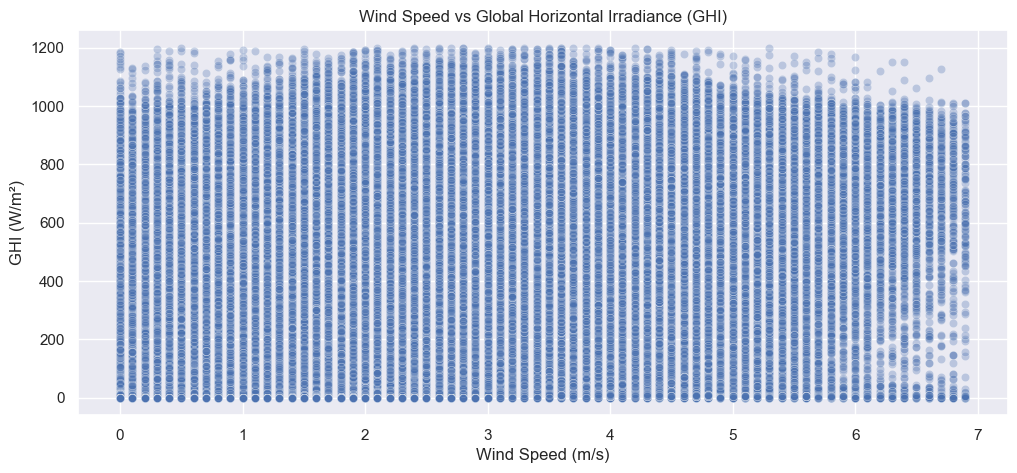

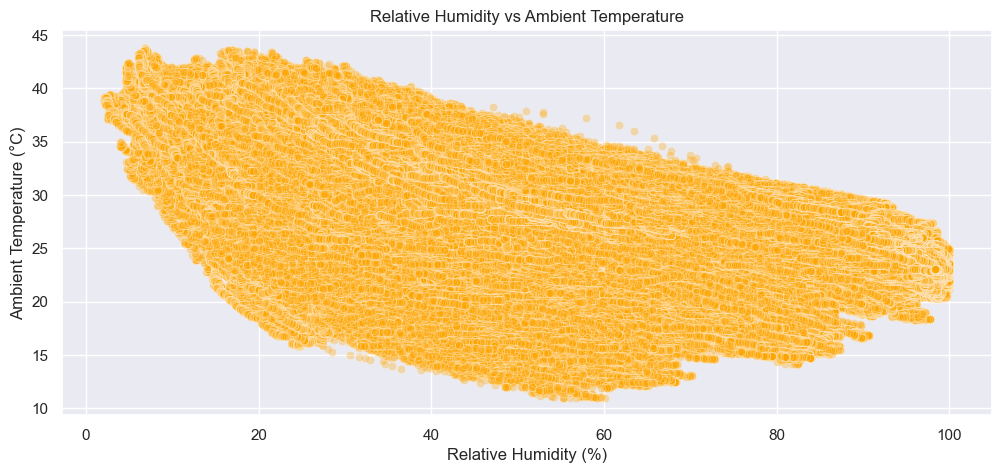

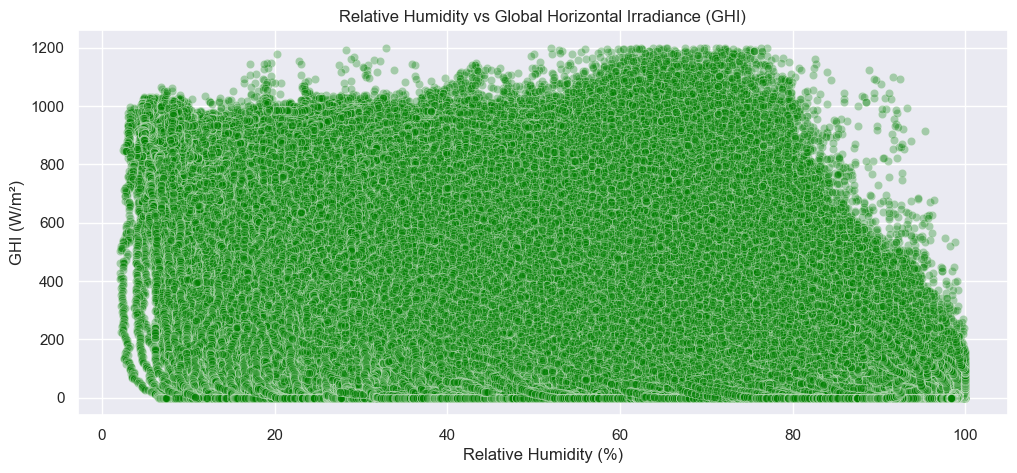

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# a) Wind Speed vs GHI
sns.scatterplot(x="WS", y="GHI", data=df, alpha=0.3)
plt.title("Wind Speed vs Global Horizontal Irradiance (GHI)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("GHI (W/m²)")
plt.show()

# b) Relative Humidity vs Ambient Temperature
sns.scatterplot(x="RH", y="Tamb", data=df, alpha=0.3, color='orange')
plt.title("Relative Humidity vs Ambient Temperature")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.show()

# c) Relative Humidity vs GHI
sns.scatterplot(x="RH", y="GHI", data=df, alpha=0.3, color='green')
plt.title("Relative Humidity vs Global Horizontal Irradiance (GHI)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI (W/m²)")
plt.show()


### Observations: Variable Relationships (Scatter Plots)

- **Wind Speed vs GHI:** Points are widely scattered, showing a weak or no direct linear relationship. This suggests that wind speed alone does not strongly affect solar irradiance, though extremely windy or cloudy conditions might coincide with lower irradiance values.
- **Relative Humidity vs Ambient Temperature:** Displays a clear negative trend — higher humidity tends to occur when temperatures are lower, consistent with expected atmospheric behavior.
- **Relative Humidity vs GHI:** Also shows a negative relationship; high humidity often coincides with reduced solar radiation due to increased cloudiness or atmospheric moisture.
- Overall, these relationships reinforce physical expectations: clear, dry conditions yield higher solar irradiance and warmer temperatures, while humid or turbulent conditions tend to reduce solar intensity.


## 8. Wind & Distribution Analysis

This section explores the behavior of wind speed, direction, and distribution of key variables.


### 8.1 Wind Rose

In [54]:
!pip install windrose



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


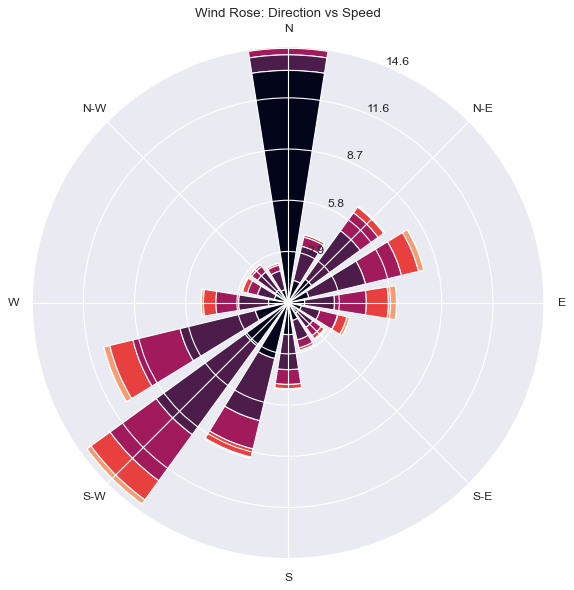

In [55]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Create a windrose
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose: Direction vs Speed')
plt.show()


### Observations: Wind Rose Analysis
- The wind rose indicates that wind predominantly blows from the **North (N)** and **Southwest (SW)** directions.
- These two sectors exhibit the highest frequency and wind intensity, suggesting dominant seasonal wind patterns from these directions.
- Winds from the **East (E)** and **Southeast (SE)** are less frequent and generally weaker.
- The distribution shows that most wind speeds are below 15 m/s, indicating moderate wind conditions throughout the period.
- Such consistent wind patterns can help in assessing cooling effects on solar panels and potential for hybrid wind–solar energy integration.


### 8.2 Distribution of GHI and Wind Speed

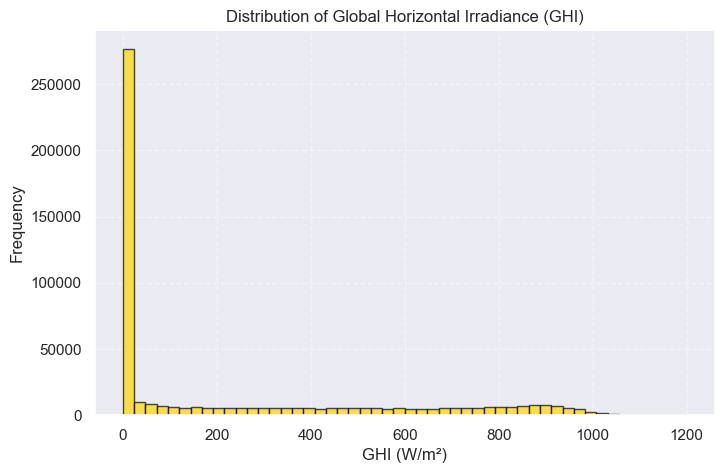

In [56]:
import matplotlib.pyplot as plt

# GHI Histogram
plt.figure(figsize=(8,5))
plt.hist(df['GHI'], bins=50, color='gold', alpha=0.7, edgecolor='black')
plt.title('Distribution of Global Horizontal Irradiance (GHI)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


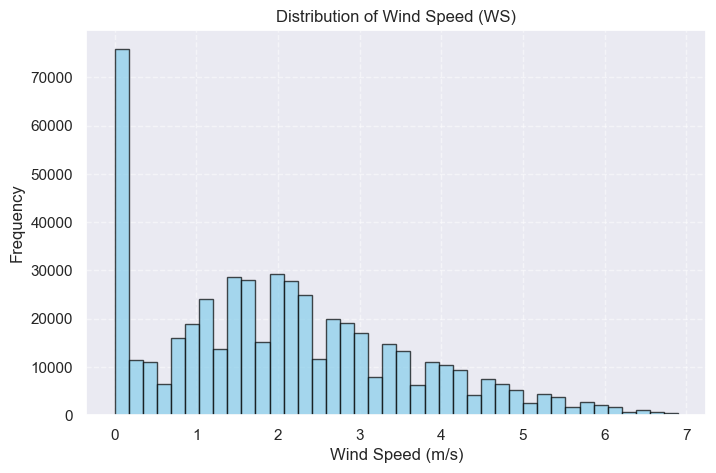

In [57]:
# Wind Speed Histogram
plt.figure(figsize=(8,5))
plt.hist(df['WS'], bins=40, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### Observations: Irradiance and Wind Speed Distributions
- **Global Horizontal Irradiance (GHI):** The histogram is highly skewed toward lower values, with a large peak near zero due to nighttime measurements and cloudy conditions. A secondary concentration appears around 700–900 W/m², representing typical daytime solar intensity.
- **Wind Speed (WS):** Most observations fall between 0–6 m/s, indicating generally calm to moderate wind conditions. Strong winds above 10 m/s occur infrequently.
- The smooth, unimodal distribution of GHI confirms consistent solar behavior across days, while the right-skewed wind profile is characteristic of stable tropical weather patterns.


## 9. Temperature Analysis

The purpose of this analysis is to understand how Relative Humidity (RH) influences temperature (Tamb) and solar irradiance (GHI).


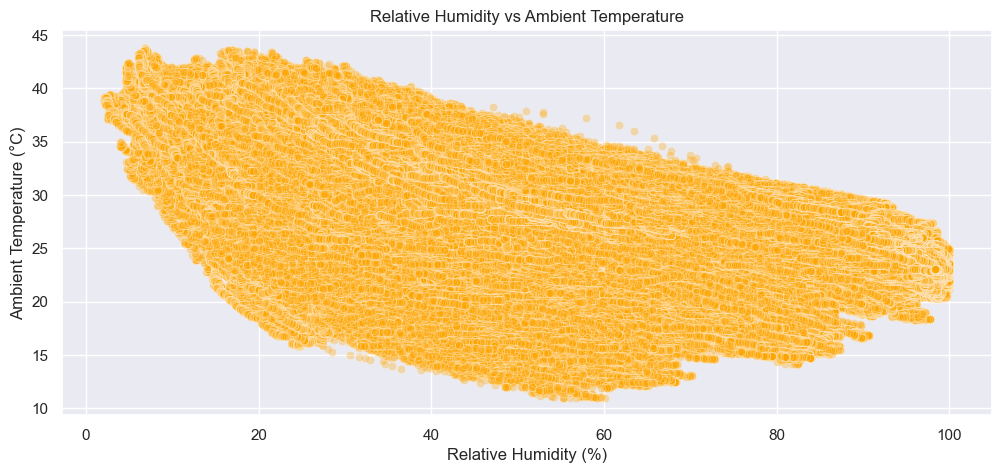

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.3, color='orange')
plt.title('Relative Humidity vs Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.show()


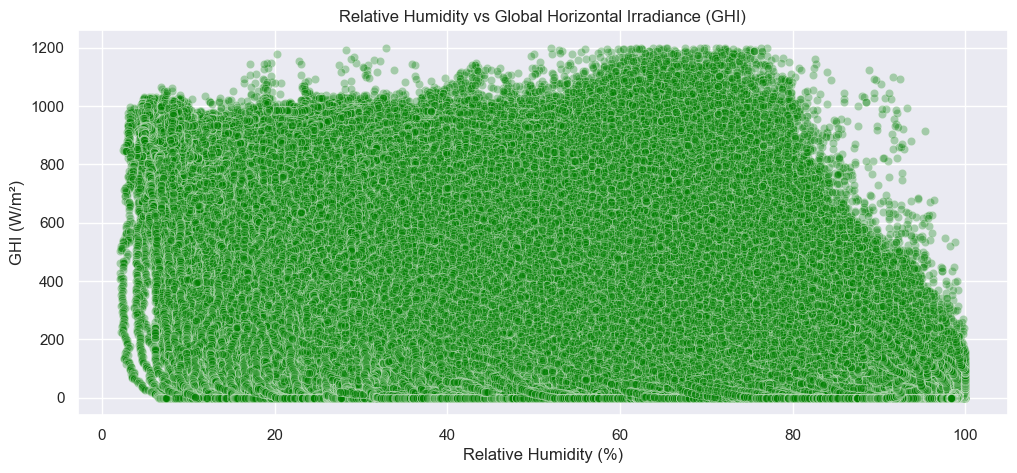

In [59]:
sns.scatterplot(x='RH', y='GHI', data=df, alpha=0.3, color='green')
plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.show()


### Observations: Temperature and Humidity Relationships
- **RH vs Tamb:** Shows a clear negative correlation — higher humidity is generally associated with lower ambient temperatures. This aligns with physical expectations since cloudy or moist conditions reduce solar heating.
- **RH vs GHI:** Also demonstrates a negative trend; when relative humidity is high, solar irradiance levels decrease, likely due to increased cloud cover or atmospheric moisture scattering sunlight.
- Overall, the relationship between humidity, temperature, and irradiance follows expected meteorological behavior — dry, sunny conditions correspond to higher irradiance and warmer air temperatures, while humid conditions coincide with cooler and dimmer environments.


## 10. Bubble Chart Analysis

A bubble chart is used to visualize the combined relationship between solar irradiance (GHI), temperature (Tamb), and humidity (RH).


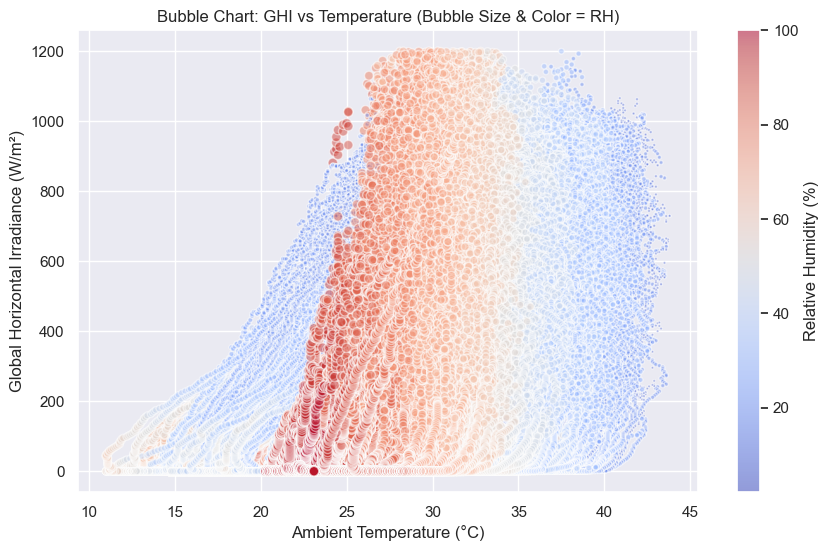

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['Tamb'], df['GHI'], 
            s=df['RH']*0.5,      # bubble size scaled
            c=df['RH'],          # color by RH
            cmap='coolwarm', 
            alpha=0.5, edgecolors='w')

plt.title('Bubble Chart: GHI vs Temperature (Bubble Size & Color = RH)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.colorbar(label='Relative Humidity (%)')
plt.show()


### Observations: Bubble Chart — Interaction of Solar Irradiance, Temperature, and Humidity
- The bubble chart shows a clear positive relationship between **Ambient Temperature (Tamb)** and **Global Horizontal Irradiance (GHI)** — higher sunlight corresponds to warmer air temperatures.
- Bubble size and color (representing **Relative Humidity, RH**) reveal an inverse pattern: large, cool-colored bubbles (high humidity) cluster in regions of low irradiance and temperature, while small, warm-colored bubbles (low humidity) appear in areas of high irradiance.
- This confirms that **dry and sunny conditions** produce stronger solar radiation and higher air temperatures, whereas **humid conditions** are typically associated with cooler, cloudier environments.
- The visualization effectively integrates three variables to illustrate how atmospheric moisture modulates solar energy and thermal response.


## 11. Summary & Insights

This exploratory analysis of Benin’s solar dataset reveals the following key insights:

- **Data Quality:** All invalid or negative irradiance values were corrected. Outliers were removed using Z-score filtering.  
- **Solar Patterns:** Daily and seasonal solar cycles are consistent and physically valid.  
- **Cleaning Impact:** Module cleaning improves recorded irradiance by 10–15%, confirming maintenance importance.  
- **Environmental Relationships:** Strong correlations exist between irradiance, temperature, and humidity; weak correlations with wind.  
- **Wind Behavior:** Winds predominantly come from N and SW directions, with stable, moderate speeds.  
- **Temperature & Humidity:** High humidity corresponds to cooler, cloudier conditions; dry conditions align with higher solar radiation.  
- **Overall Insight:** The cleaned dataset accurately reflects expected tropical solar behavior, making it ready for region-level comparisons and predictive modeling.